In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install missingno

In [3]:
import missingno as msno

In [4]:
data = pd.read_csv('Stores.csv')
data.head(5)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [5]:
#remove the store id
data.drop(data.columns[[0]],axis=1,inplace=True)

In [6]:
data.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [7]:
data.shape

(896, 4)

In [8]:
data.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


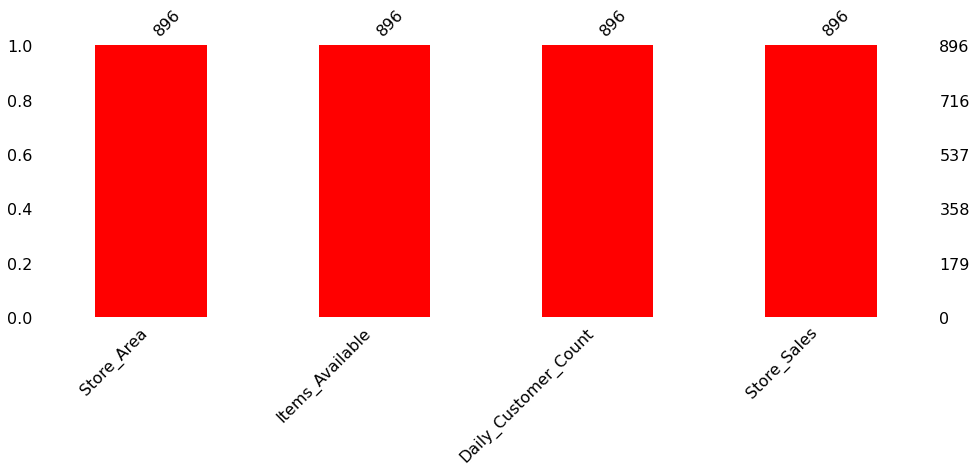

In [10]:
msno.bar(data,figsize=(16,5),color='red')
plt.show()

In [12]:
for column_name in data.columns:
    unique_values = len(data[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'Store_Area' has '583' unique values
Feature 'Items_Available' has '616' unique values
Feature 'Daily_Customer_Count' has '130' unique values
Feature 'Store_Sales' has '816' unique values


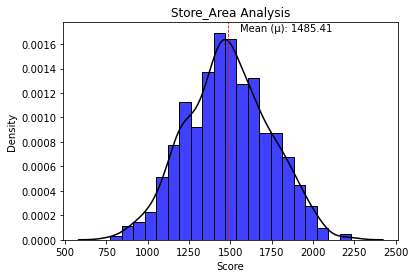

In [22]:
sns.histplot(data['Store_Area'],stat='density',color='blue')
sns.kdeplot(data['Store_Area'], color='black')
plt.axvline(data['Store_Area'].mean(), color='red', linestyle='--', linewidth=0.8)
min_ylim, max_ylim = plt.ylim()
plt.text(data['Store_Area'].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(data['Store_Area'].mean()))
plt.xlabel("Score")
plt.ylabel("Density")
plt.title("Store_Area Analysis")
plt.show()

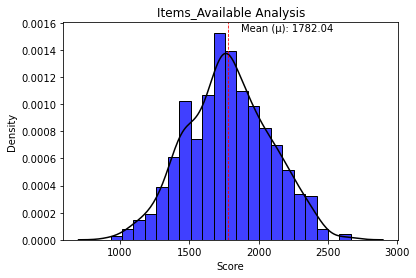

In [21]:
sns.histplot(data['Items_Available'],stat='density',color='blue')
sns.kdeplot(data['Items_Available'], color='black')
plt.axvline(data['Items_Available'].mean(), color='red', linestyle='--', linewidth=0.8)
min_ylim, max_ylim = plt.ylim()
plt.text(data['Items_Available'].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(data['Items_Available'].mean()))
plt.xlabel("Score")
plt.ylabel("Density")
plt.title("Items_Available Analysis")
plt.show()

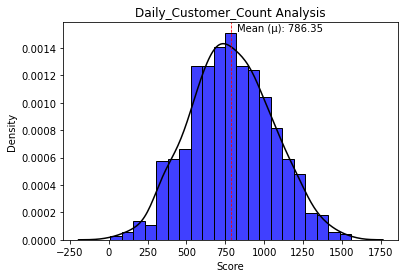

In [20]:
sns.histplot(data['Daily_Customer_Count'],stat='density',color='blue')
sns.kdeplot(data['Daily_Customer_Count'], color='black')
plt.axvline(data['Daily_Customer_Count'].mean(), color='red', linestyle='--', linewidth=0.8)
min_ylim, max_ylim = plt.ylim()
plt.text(data['Daily_Customer_Count'].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(data['Daily_Customer_Count'].mean()))
plt.xlabel("Score")
plt.ylabel("Density")
plt.title("Daily_Customer_Count Analysis")
plt.show()

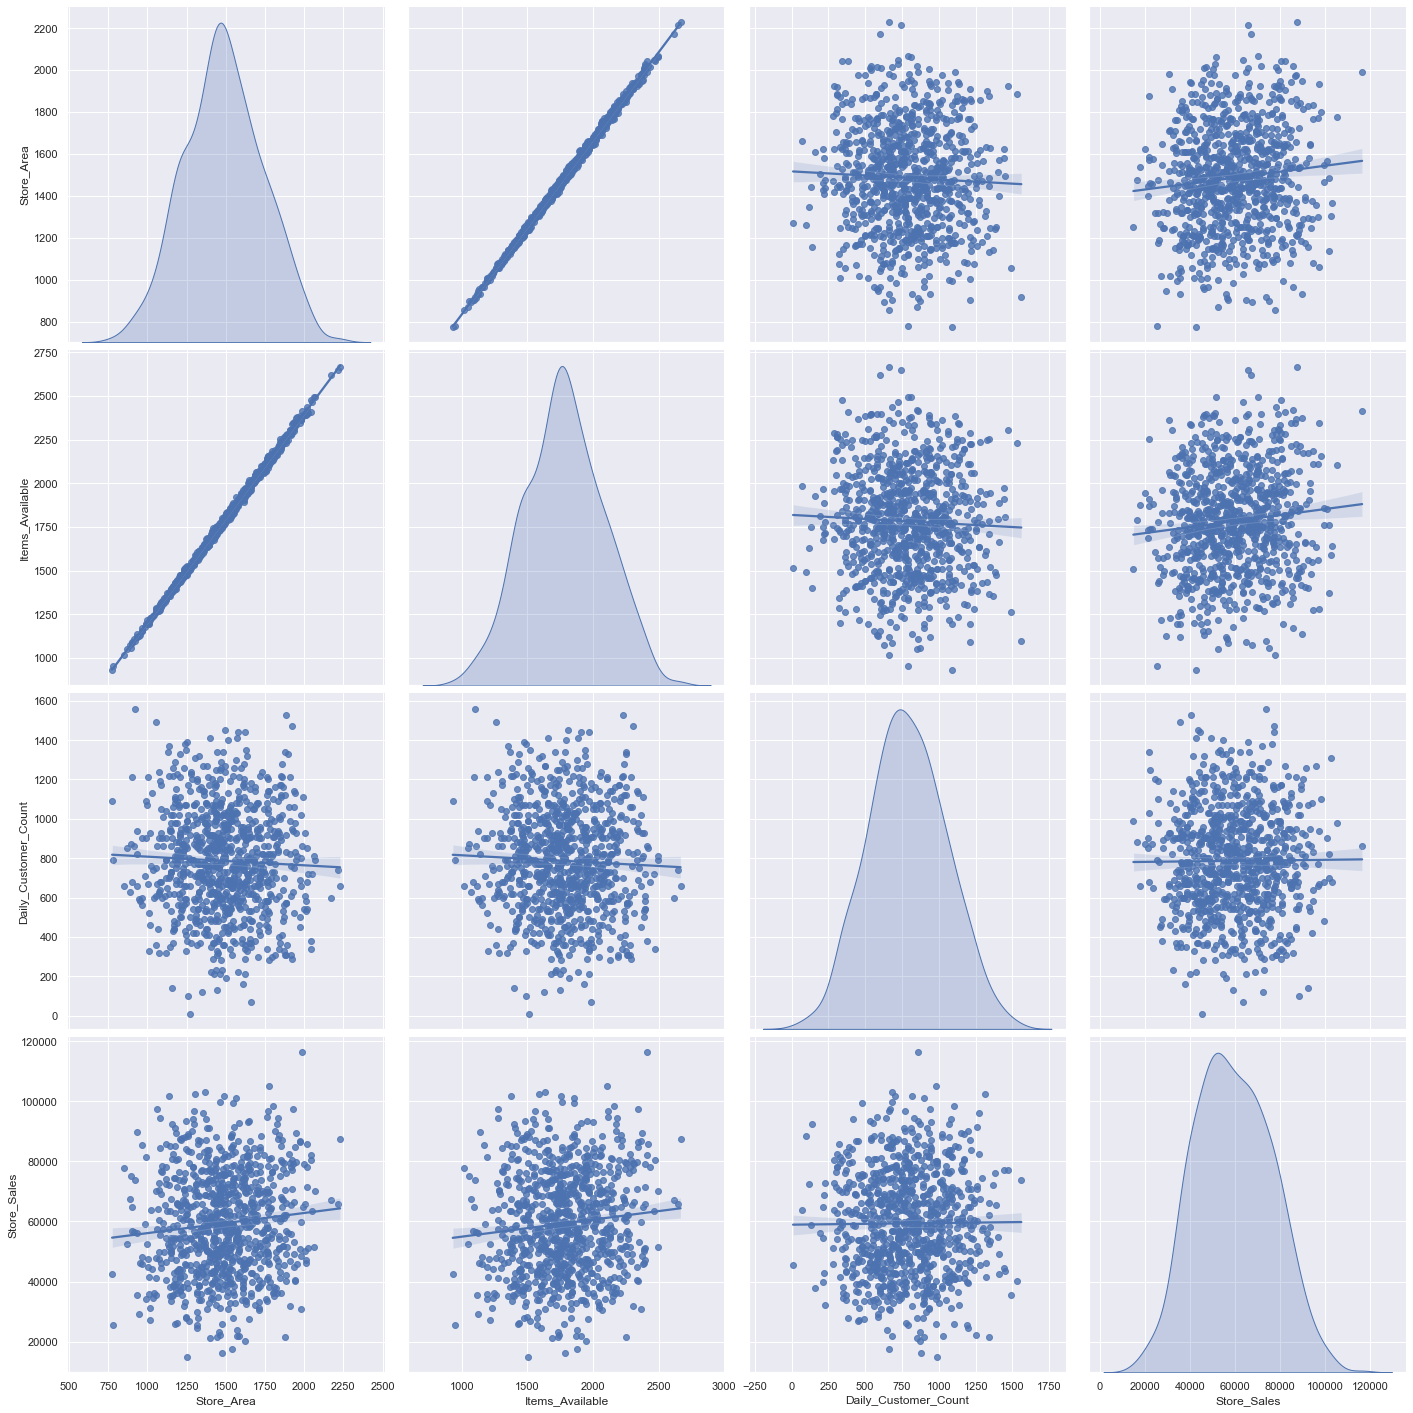

In [23]:
sns.set()
sns.pairplot(data,height = 5 ,kind ='reg',diag_kind='kde')
plt.show()

In [24]:
data=data.drop('Store_Area',axis=1)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


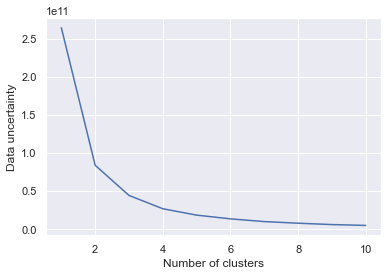

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(data)
    wcss.append(km.inertia_)
fig, ax = plt.subplots()

ax.plot(range(1,11),wcss)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Data uncertainty')

plt.show()

In [26]:
from sklearn.neighbors import LocalOutlierFactor

In [27]:
clf = LocalOutlierFactor(n_neighbors=5, contamination='auto')
y_pred = clf.fit_predict(data) 

In [28]:
data['Out']=y_pred

In [29]:
Out=data[data['Out']!=1]

In [30]:
data2=data[data['Out']==1]

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

"\ny=train2['Store_Sales']\nX=train2.drop(['Store_Sales','Out'],axis=1)\n"

In [32]:
!pip install xgboost

In [34]:
y=data2['Store_Sales']
X=data2.drop(['Store_Sales','Out'],axis=1)

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
models = [RandomForestRegressor(), LinearRegression(),ElasticNet(), KNeighborsRegressor(),xgb.XGBRegressor()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(f'RMSE: {mean_squared_error(y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print('-'*30, '\n')

model: RandomForestRegressor()
RMSE: 322973914.57137465
MAE: 14973.251827651517
------------------------------ 

model: LinearRegression()
RMSE: 254003891.854681
MAE: 13228.167904160182
------------------------------ 

model: ElasticNet()
RMSE: 254003889.17001352
MAE: 13228.168461403227
------------------------------ 

model: KNeighborsRegressor()
RMSE: 298616812.84090906
MAE: 14487.511363636364
------------------------------ 

model: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=